In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [11]:
data_downsampled = np.genfromtxt('data_sanders_downsampled.csv', delimiter=',')

In [12]:
data_downsampled.shape

(516, 3)

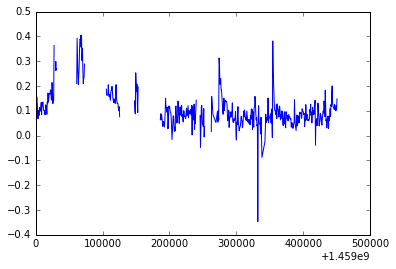

In [13]:
plt.plot(data_downsampled[:,0], data_downsampled[:,1])

In [33]:
inds = np.where(data_downsampled[:,1] > 0.3)[0]
a = data_downsampled[inds,0][-1]
print a

1459354231.98


In [14]:
data = np.genfromtxt('data_sanders_00000.csv', delimiter=',')

In [98]:
s = np.array([d for d in data if d[0] > a-60*5 and d[0] < a+60*(10*10+5) and not d[1] == 0])
print s.shape

(7950, 2)


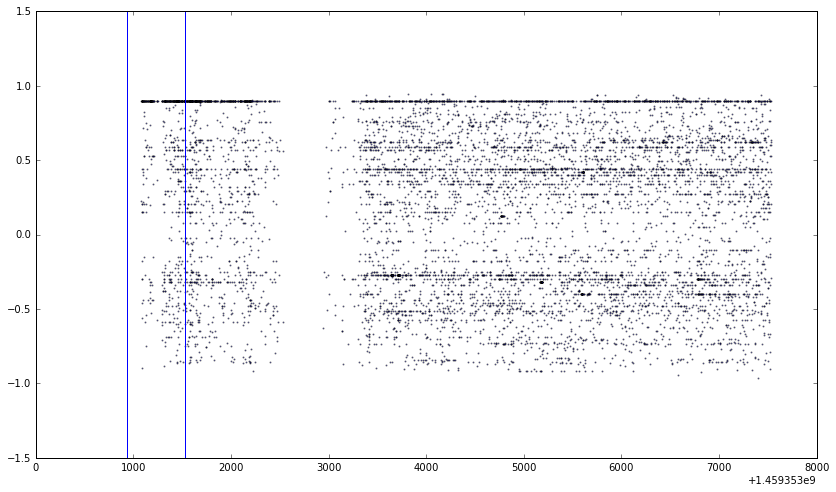

In [100]:
plt.figure(figsize=(14,8))
plt.scatter(s[:,0], s[:,1], s=1, alpha=0.5)
plt.axvline(x=a-60*5)
plt.axvline(x=a+60*5)

In [91]:
np.mean(s[:,1])

0.32620553359683796

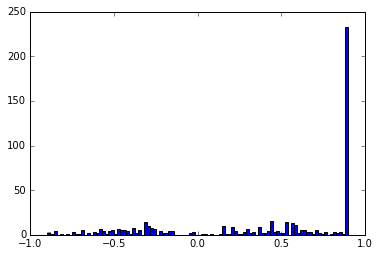

In [79]:
plt.hist(s[:,1], 100)
plt.show()

In [81]:
from scipy.stats import mode

In [82]:
mode(s[:,1])

ModeResult(mode=array([ 0.9001]), count=array([233]))

# Mode

In [110]:
m = mode(s[:,1])

In [122]:
print m[1][0]/len(s[:,1])

0.15748427673


In [124]:
print m[1][0]
print len(s[:,1])

1252
7950


In [202]:
modes = np.empty((515,4))
counter=0
mood = []
tweets = 0
min_tweets = 100
prev_time = data[0,0]
R = 10*60

for row in data:
    tweets += 1
    if not row[1] == 0:
        mood.append(float(row[1]))
    time_diff = float(row[0]) - prev_time
    if time_diff > R:
        if int(time_diff / R) > 1:
            modes[counter] = [row[0]-(time_diff*0.5), None, None, None]
            counter += 1
        elif time_diff > R and tweets > min_tweets:
            m = mode(mood)
            modes[counter]=[row[0]-(R*0.5), m[0][0], m[1][0], m[1][0]/len(mood)]
            counter += 1
        mood = []
        prev_time = float(row[0])
        tweets = 0

In [199]:
modes.shape

(508, 4)

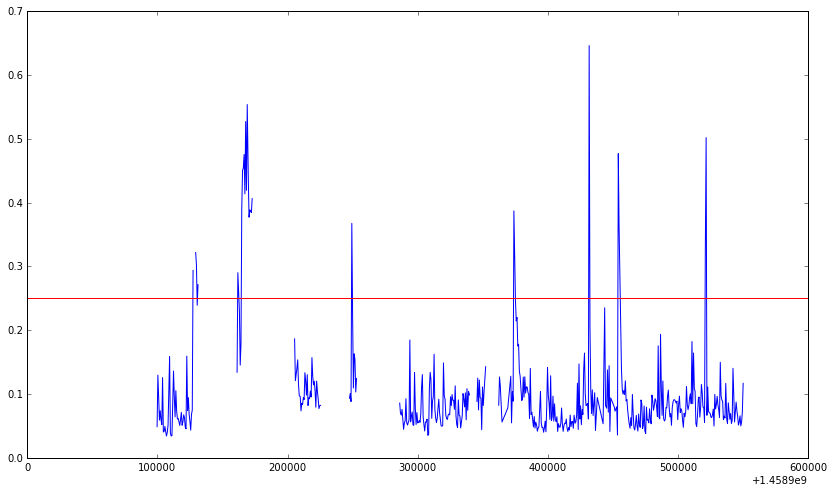

In [208]:
# threshold = np.nanstd(modes[:,3]) * 3
threshold = 0.25

plt.figure(figsize=(14,8))
plt.plot(modes[:,0], modes[:,3])
plt.axhline(y=threshold, c='r')